In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EDA/used-cars/used_cars_data.csv')

In [ ]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.shape

(7253, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


milage ,engine, power, seats, new_price, price have null values

In [ ]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [ ]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [ ]:
(df.isnull().sum()/(len(df)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

the price features have a lot of missing values

In [ ]:
df = df.drop(columns='S.No.',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


the age of the car is an important factor that contributes to the price of the car we need to create a car_age feature from given information in order to predict the price effectively

In [ ]:
from datetime import date
df['car_age'] = date.today().year - df['Year']
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11


In [ ]:
date.today().year

2024

In [ ]:
df.car_age.value_counts()

9     929
10    925
8     886
11    791
7     709
12    690
13    579
14    407
6     361
15    252
16    207
17    148
5     119
18     89
19     68
20     35
21     20
22     18
23      8
24      5
26      4
25      2
28      1
Name: car_age, dtype: int64

the brand names of the car will be a great information for our predictor of price

In [ ]:
df.Name.value_counts()

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

In [ ]:
df['Brand'] = df.Name.str.split().str.get(0)
df['Model'] = df.Name.str.split().str.get(1) + df.Name.str.split().str.get(2)

In [ ]:
df[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [ ]:
print(df.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


In [ ]:
print(df.Brand.nunique())

33


In [ ]:
df['Brand'].replace({"ISUZU":"Isuzu", "Mini":"Mini Cooper", "Land":"Land Rover"})

0              Maruti
1             Hyundai
2               Honda
3              Maruti
4                Audi
            ...      
7248       Volkswagen
7249       Volkswagen
7250           Nissan
7251       Volkswagen
7252    Mercedes-Benz
Name: Brand, Length: 7253, dtype: object

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11,Audi,A4New


lets now investigate the data! to check for patterns

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0
car_age,7253.0,10.634634,3.254421,5.00,8.0,10.00,13.00,28.0


In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7207,386,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


let us seperate the numeric and categorical features for ease in analysis

In [ ]:
cat_cols = df.select_dtypes(include = ['object']).columns
num_cols = df.select_dtypes(include = np.number).columns.tolist()
print("categorical variables")    #count plot, bar chart, pie plot
print(cat_cols)
print("numerical columns")        #histogram, box plot, density plot
print(num_cols)

categorical variables
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')
numerical columns
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'car_age']


Univariate analysis

In [ ]:
cat_cols

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')

In [ ]:
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13,Honda,JazzV


we see power, engine, newprice, mileage can also come under num_cols

In [ ]:
df['Engine(CC)'] = df['Engine'].str.extract('(\d+.\d+)').astype(float)
df['Engine(CC)'].unique()

array([ 998., 1582., 1199., 1248., 1968.,  814., 1461., 2755., 1598.,
       1462., 1497., 2179., 2477., 1498., 2143., 1995., 1984., 1197.,
       2494., 1798., 2696., 2698., 1061., 1198., 2987.,  796.,  624.,
       1999., 1991., 2694., 1120., 2498.,  799., 2393., 1399., 1796.,
       2148., 1396., 1950., 4806., 1998., 1086., 1193., 2982., 1493.,
       2967., 2993., 1196., 1799., 2497., 2354., 1373., 2996., 1591.,
       2894., 5461., 1595.,  936., 1997.,   nan, 1896., 1390., 1364.,
       2199.,  993.,  999., 1405., 2956., 1794.,  995., 2496., 1599.,
       2400., 1495., 2523.,  793., 4134., 1596., 1395., 2953., 1586.,
       2362., 1496., 1368., 1298., 1956., 1299., 3498., 2835., 1150.,
       3198., 1343., 1499., 1186., 1590., 2609., 2499., 2446., 1978.,
       2360., 3436., 2198., 4367., 2706., 1422., 2979., 1969., 1489.,
       2489., 1242., 1388., 1172., 2495., 1194., 3200., 1781., 1341.,
       2773., 3597., 1985., 2147., 1047., 2999., 2995., 2997., 1948.,
       2359., 4395.,

In [ ]:
df.New_Price.unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '49.14 Lakh',
       '11.81 Lakh', '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh',
       '27 Lakh', '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh',
       '14.44 Lakh', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr',
       '60.88 Lakh', '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh',
       '10.52 Lakh', '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr',
       '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '12.51 Lakh', '9.74 Lakh', '95.38 Lakh',
       '60.59 Lakh', '11.28 Lakh', 

In [ ]:
df['Power(bhp)'] = df['Power'].str.extract('(\d+.\d+)').astype(float)
df['Power(bhp)'].unique()

array([ 58.16 , 126.2  ,  88.7  ,  88.76 , 140.8  ,  55.2  ,  63.1  ,
       171.5  , 103.6  ,     nan, 103.25 , 116.3  , 187.7  , 115.   ,
       175.56 ,  98.6  ,  83.8  , 167.62 , 190.   ,  88.5  , 177.01 ,
        67.1  , 102.   , 108.45 , 138.1  , 184.   , 179.5  , 103.5  ,
       254.8  ,  73.9  ,  46.3  ,  37.5  ,  82.9  , 149.92 , 138.03 ,
       112.2  , 163.7  , 105.   , 174.33 , 103.2  ,  53.3  ,  78.9  ,
       147.6  , 147.8  , 186.   , 170.   , 140.   , 194.   , 500.   ,
       108.5  ,  86.8  , 187.74 , 132.   ,  86.7  ,  73.94 , 117.3  ,
       218.   , 168.5  ,  89.84 , 110.   ,  82.85 , 241.4  , 270.9  ,
       126.32 , 130.   , 100.6  , 150.   ,  75.94 , 215.   , 107.3  ,
        37.48 , 120.   , 178.   , 152.   ,  91.1  ,  85.8  , 362.07 ,
       121.3  , 143.   ,  81.8  , 171.   ,  76.8  , 103.52 , 444.   ,
       362.9  ,  67.06 , 120.7  , 258.   ,  81.86 , 112.   ,  88.73 ,
        57.6  , 157.75 , 102.5  , 201.1  ,  83.1  ,  68.05 , 106.   ,
       100.   ,  81.

In [ ]:
num_cols

['Year', 'Kilometers_Driven', 'Seats', 'Price', 'car_age']

In [ ]:
df.Mileage.unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [ ]:
df['Mileage'] = df['Mileage'].str.extract('(\d+.\d+)').astype(float)
df['Mileage'].unique()

array([26.6 , 19.67, 18.2 , 20.77, 15.2 , 21.1 , 23.08, 11.36, 20.54,
       22.3 , 21.56, 16.8 , 25.2 , 12.7 ,  0.  , 13.5 , 25.8 , 28.4 ,
       20.45, 14.84, 22.69, 23.65, 13.53, 18.5 , 14.4 , 20.92, 17.5 ,
       12.8 , 19.01, 14.53, 11.18, 12.4 , 16.09, 14.  , 24.3 , 18.15,
       11.74, 22.07, 19.7 , 25.4 , 25.32, 14.62, 14.28, 14.9 , 11.25,
       24.4 , 16.55, 17.11, 22.9 , 17.8 , 18.9 , 15.04, 25.17, 20.36,
       13.29, 13.68, 20.  , 15.8 , 25.  , 16.4 , 24.52, 22.1 ,  8.5 ,
       15.1 , 16.95, 19.64, 16.5 , 18.53, 17.57, 18.  , 23.2 , 16.73,
       17.  , 13.  , 17.68, 22.7 , 16.2 , 15.26, 23.  , 19.83, 14.94,
       17.71, 14.74, 16.  , 22.32, 12.99, 23.3 , 19.15, 10.8 , 15.  ,
       22.  , 21.9 , 12.05, 11.7 , 21.21, 20.73, 24.07, 19.  , 20.58,
       19.27, 11.5 , 18.6 , 21.14, 11.05, 21.76,  7.81, 21.66, 17.2 ,
       20.63, 19.4 , 14.8 , 26.  , 20.4 , 21.5 , 15.3 , 17.9 , 16.6 ,
       22.54, 25.44, 13.7 , 22.48, 12.9 , 19.98, 21.4 , 19.81, 15.4 ,
       25.47, 19.87,

In [ ]:
df['New_Price'] = df['New_Price'].astype(str)

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    price_str = row['New_Price']

    # Check if the price is in Crores (Cr)
    if 'Cr' in price_str:
        # Extract the numerical value
        price_in_crores = float(price_str.replace('Cr', '').strip())

        # Convert Crores to Lakhs (1 Cr = 100 Lakhs)
        price_in_lakhs = price_in_crores * 100

        # Update the DataFrame with the new value and suffix
        df.at[index, 'New_Price'] = f'{price_in_lakhs:.2f} Lakhs'

df['New_Price']

0             nan
1             nan
2       8.61 Lakh
3             nan
4             nan
          ...    
7248          nan
7249          nan
7250          nan
7251          nan
7252          nan
Name: New_Price, Length: 7253, dtype: object

In [ ]:
df['New_Price'] = df['New_Price'].str.extract('(\d+.\d+)').astype(float)

In [ ]:
df['New_Price']

0        NaN
1        NaN
2       8.61
3        NaN
4        NaN
        ... 
7248     NaN
7249     NaN
7250     NaN
7251     NaN
7252     NaN
Name: New_Price, Length: 7253, dtype: float64

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_age,Brand,Model,Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,NaN,1.75,14,Maruti,WagonR,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50,9,Hyundai,Creta1.6,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61,4.50,13,Honda,JazzV,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00,12,Maruti,ErtigaVDI,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74,11,Audi,A4New,1968.0,140.80


In [ ]:
df = df.drop(['Power', 'Engine'], axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_Price,Price,car_age,Brand,Model,Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,5.0,NaN,1.75,14,Maruti,WagonR,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,5.0,NaN,12.50,9,Hyundai,Creta1.6,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,5.0,8.61,4.50,13,Honda,JazzV,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,7.0,NaN,6.00,12,Maruti,ErtigaVDI,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,5.0,NaN,17.74,11,Audi,A4New,1968.0,140.80


In [ ]:
df.shape

(7253, 16)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.17,18.16,21.1000,33.54
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.0000,10.00
New_Price,990.0,22.830677,27.953604,3.91,7.88,11.48,25.6975,375.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.9500,160.00
car_age,7253.0,10.634634,3.254421,5.00,8.00,10.00,13.0000,28.00
Engine(CC),7206.0,1616.787816,595.048244,624.00,1198.00,1493.00,1968.0000,5998.00
Power(bhp),5926.0,120.278296,55.216562,34.20,83.10,103.60,147.5100,616.00


let us plot histogram and boxplot for our numerical columns

Year


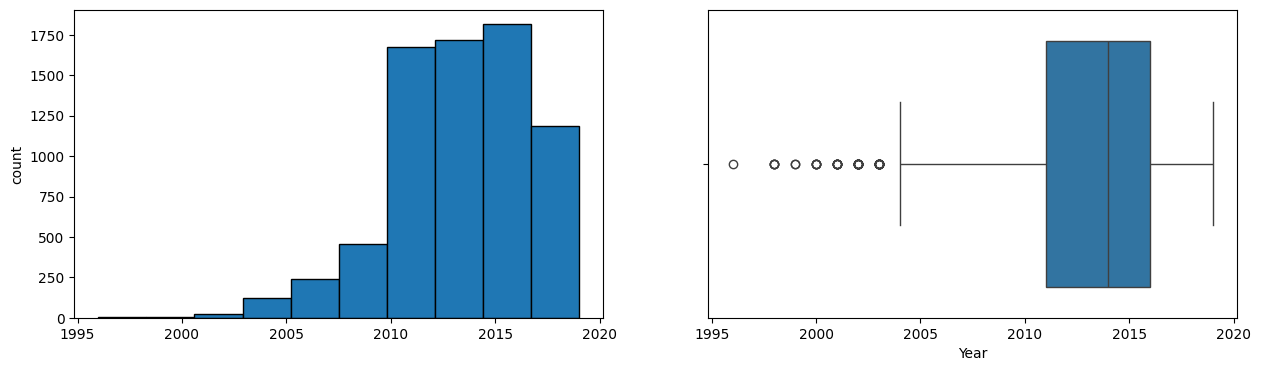

Kilometers_Driven


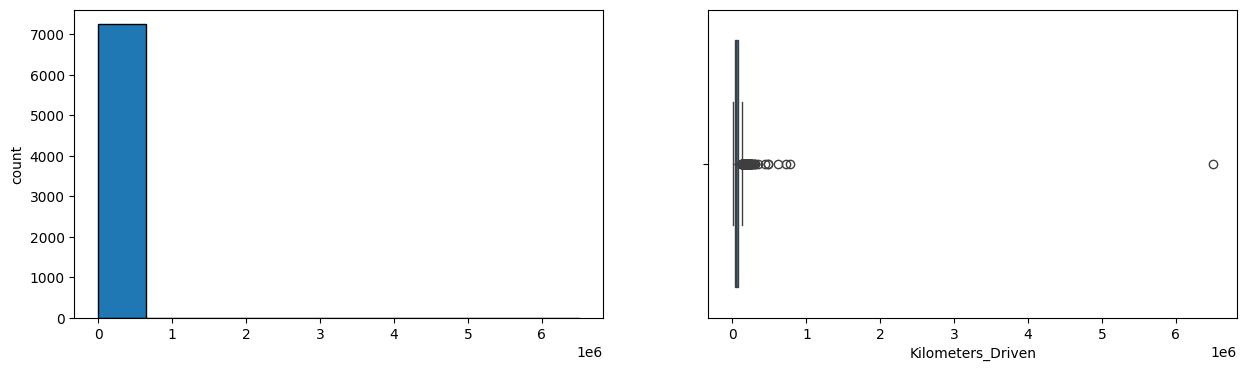

Seats


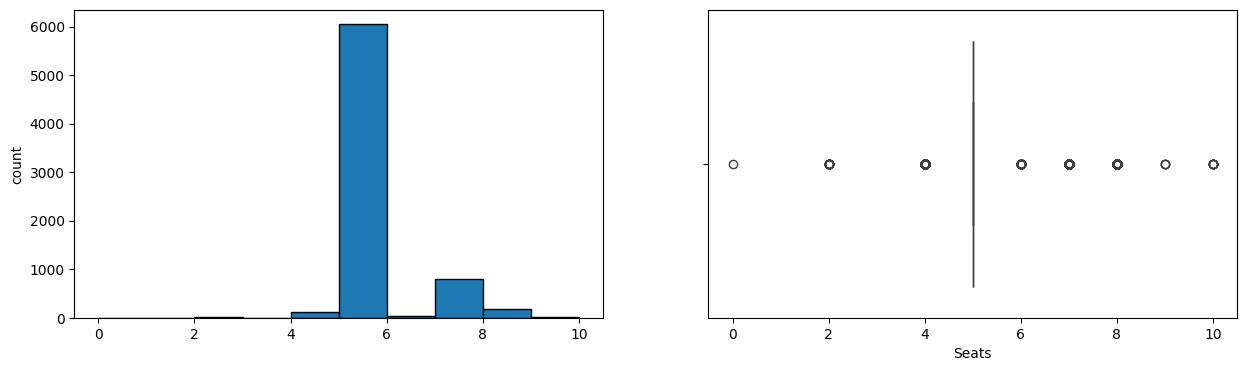

Price


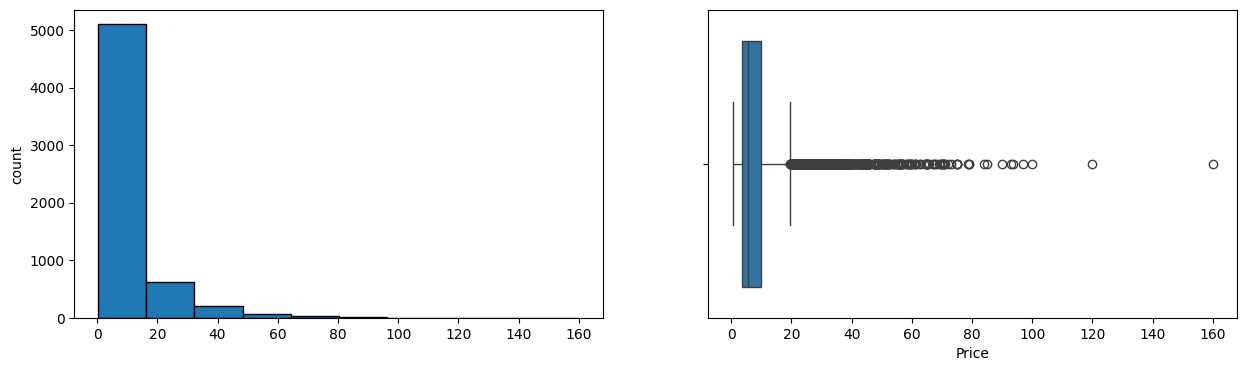

car_age


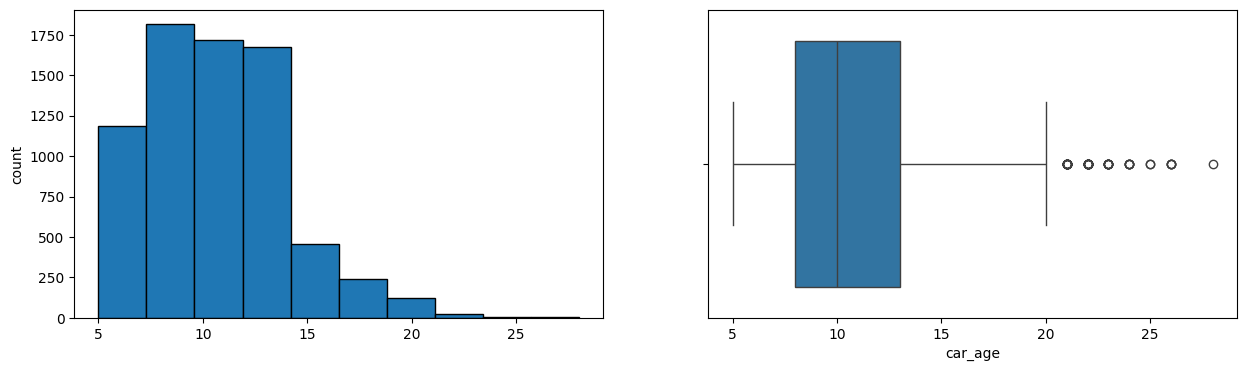

In [ ]:
for col in num_cols:
  print(col)
  plt.figure(figsize = (15,4))
  plt.subplot(1,2,1)
  df[col].hist(grid=False,edgecolor='black')
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(x=df[col])
  plt.show()

km driven and price are right skewed we can transform them

In [ ]:
def log_transform(df,col):
  for i in col:
    if(df[i] == 1.0).all():
      df[i + '_log'] = np.log(df[i] + 1)
    else:
      df[i + '_log'] = np.log(df[i])
  df.info()


In [ ]:
cat_cols

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')

<Axes: xlabel='Fuel_Type', ylabel='count'>

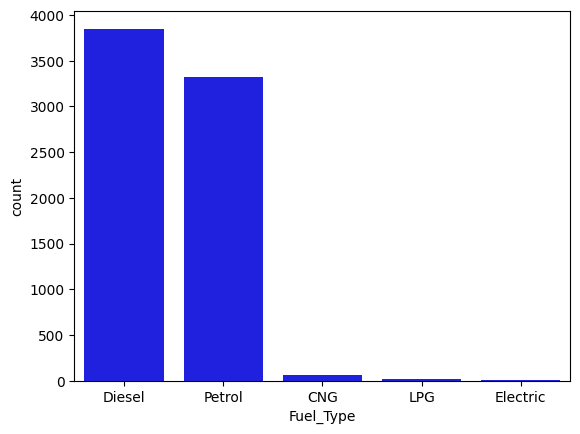

In [ ]:
sns.countplot(x = "Fuel_Type", data=df, color='blue', order = df['Fuel_Type'].value_counts().index)

In [ ]:
cat_cols

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')

drawing countplot to analyze each of my cat cols

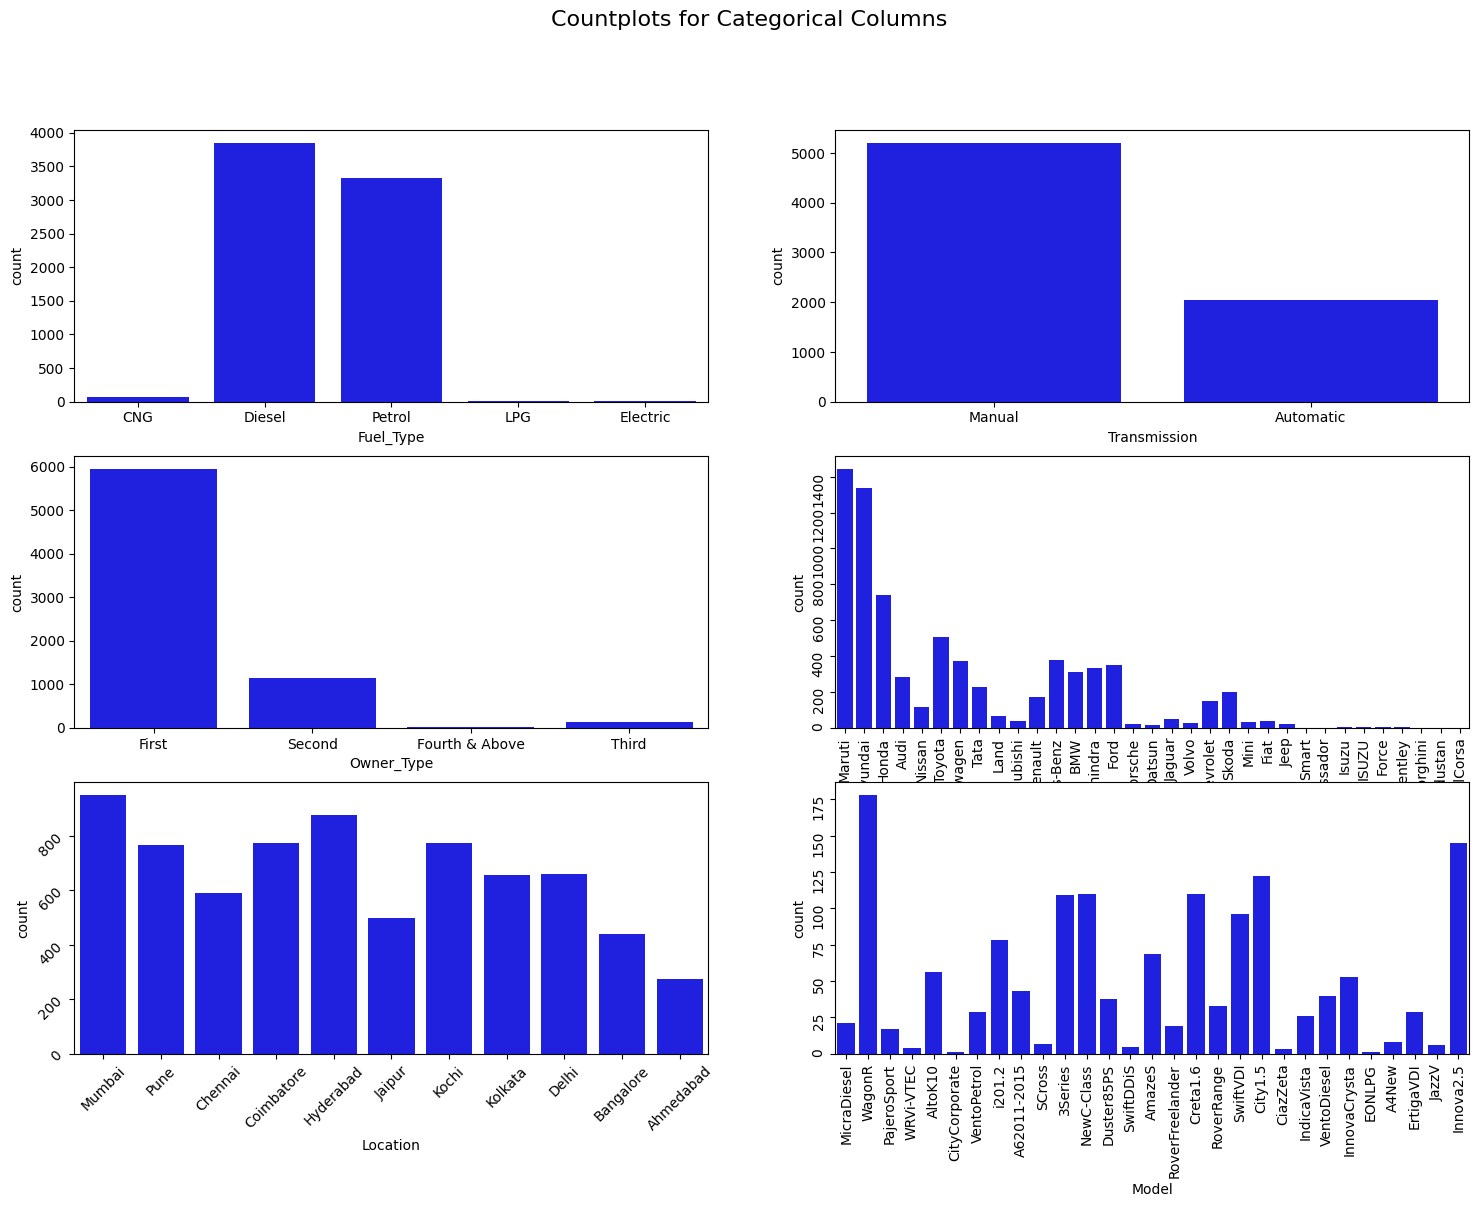

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(18,12))
fig.suptitle("Countplots for Categorical Columns", fontsize=16)
sns.countplot(ax = axes[0,0], x='Fuel_Type', data=df, color='blue')
sns.countplot(ax = axes[0,1], x='Transmission', data=df, color='blue')
sns.countplot(ax = axes[1,0], x='Owner_Type', data=df, color='blue')
sns.countplot(ax = axes[1,1], x='Brand', data=df, color='blue')
sns.countplot(ax = axes[2,0], x='Location', data=df, color='blue')
sns.countplot(ax = axes[2,1], x='Model', data=df, color='blue', order=df['Model'].head(30).value_counts().index)

axes[1][1].tick_params(labelrotation = 90)
axes[2][1].tick_params(labelrotation = 90)
axes[2][0].tick_params(labelrotation = 45)

